In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import re

from sklearn.preprocessing import MultiLabelBinarizer

# Load the data
df = pd.read_csv('C:/Users/NAS/Documents/uni stuffs/Y3 S1/nlp/vgsales_Clean.csv')
# Reduce dataframe to feature 'Name', and label 'Genre'
df = df[['Name','Genre']].copy()
df.head()

,Name,Genre
0,Wii Sports,Sports
1,Mario Kart Wii,Racing
2,Wii Sports Resort,Sports
3,Pokemon Red/Pokemon Blue,Role-Playing
4,Tetris,Strategy


In [25]:
tokens = nltk.word_tokenize(' '.join(df.Name.values))
text = nltk.Text(tokens)
fdist = FreqDist(text)
print(fdist)
fdist.most_common(50)

<FreqDist with 8241 samples and 62704 outcomes>


[(':', 5578),
 ('of', 1549),
 ('The', 1488),
 ('2', 978),
 ('the', 809),
 ("'s", 760),
 ('no', 597),
 ('!', 586),
 ('3', 456),
 ('World', 345),
 ('Pro', 310),
 ('&', 281),
 ('II', 278),
 ('(', 253),
 (')', 253),
 ('Star', 233),
 ('Soccer', 226),
 ('Super', 221),
 ('Wars', 212),
 ('to', 210),
 ('Game', 206),
 ('Dragon', 205),
 ('and', 204),
 ('-', 199),
 ('NBA', 193),
 ('4', 182),
 ('NFL', 175),
 ('Battle', 174),
 ('.', 157),
 ('Heroes', 154),
 ('Racing', 147),
 ('FIFA', 143),
 ('LEGO', 141),
 ('for', 139),
 ('Warriors', 137),
 ('sales', 136),
 ('DS', 130),
 ('War', 129),
 ('in', 126),
 ('Ultimate', 120),
 ('Baseball', 119),
 ('Final', 118),
 ('King', 116),
 ('Gundam', 115),
 ('III', 113),
 ('Dead', 113),
 ('NHL', 111),
 ('Force', 109),
 ('Championship', 108),
 ('Ninja', 107)]

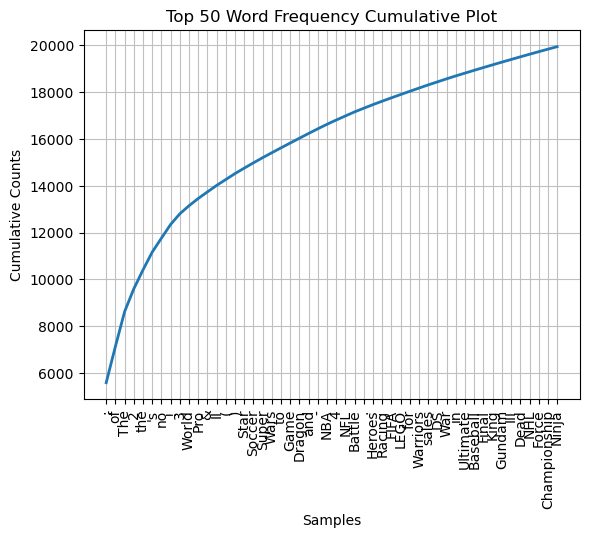

<Axes: title={'center': 'Top 50 Word Frequency Cumulative Plot'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [26]:
fdist.plot(50,cumulative=True,title='Top 50 Word Frequency Cumulative Plot')

In [27]:
text.collocations()

Tom Clancy; Madden NFL; Star Wars; Final Fantasy; Harry Potter;
Jikkyou Powerful; Pro Yakyuu; Resident Evil; Tony Hawk; Tiger Woods;
Woods PGA; PGA Tour; Dragon Ball; Major League; Powerful Pro; Dynasty
Warriors; Tomb Raider; Super Robot; Mortal Kombat; FIFA Soccer


In [28]:
genres = list(df.Genre.unique())
d = {}
for g in genres:
    names = list(df[df.Genre == g].Name.values)
    tokens = nltk.word_tokenize(' '.join(names))
    types = set(tokens)
    lexical_diversity = round(len(types) / len(tokens),3)
    d[g] = (len(tokens), len(types), lexical_diversity)
    
    #print(f"{g}: TOKENS: {len(tokens)}, TYPES: {len(types)}, LEXICAL DIVERSITY: {lexical_diversity}")
table = pd.DataFrame.from_dict(d,orient='index',columns=['tokens','type','lexical_diversity'])
display(table.sort_values('lexical_diversity'))

,tokens,type,lexical_diversity
Sports,9342,1189,0.127
Action,25542,4012,0.157
Racing,4536,943,0.208
Role-Playing,7274,1669,0.229
Simulation,3836,1107,0.289
Strategy,5287,1537,0.291
Adventure,6887,2243,0.326


In [29]:
def clean_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    # Remove roman numerals using regex
    roman_re = r'\bM{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})\b'
    tokens = [t for t in tokens if not re.match(roman_re,t,flags=re.IGNORECASE).group()]
    
    text = ' '.join(tokens).strip()
    
    return text

df.Name = df.Name.apply(lambda n: clean_text(n))
df.sample(20)

,Name,Genre
2793,international superstar soccer,Sports
4466,def jam icon,Action
2267,final fantasy legend,Role-Playing
2121,sims,Simulation
7431,hot wheels beat,Racing
7004,james bond everything nothing,Action
7479,nhl,Sports
11745,power play pool,Sports
4022,iron man,Action
9311,shrek smash n crash racing,Racing


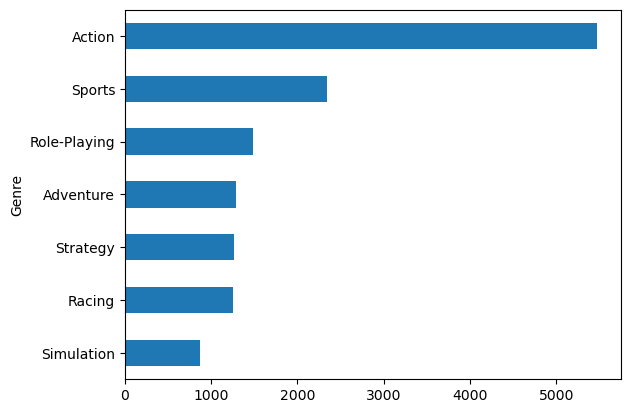

In [30]:
df.Genre.value_counts(ascending=True).plot(kind='barh')
plt.show()

# SKIP HERE

In [ ]:
df_grouped_by = df.groupby(['Genre'])
 
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
 
df_balanced = df_balanced.droplevel(['Genre'])
df_balanced

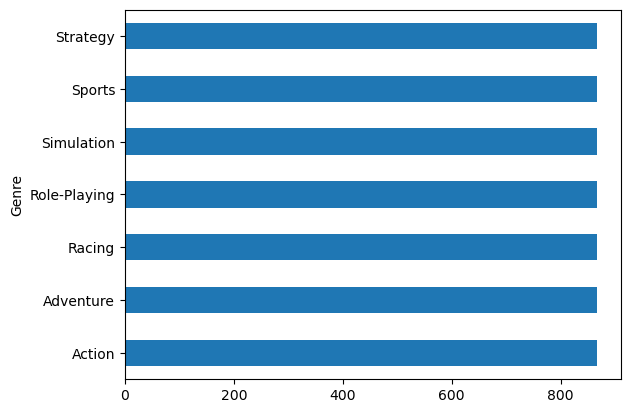

In [62]:
df_balanced.Genre.value_counts(ascending=True).plot(kind='barh')
plt.show()

In [46]:
df_balanced.to_csv('Balancevgsales.csv')

In [63]:
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
import pandas as pd
import numpy as np


# Using scikit-learn
df2 = shuffle(df_balanced)
print("Dataset shuffled using Sklearn:")
print(df2.head())

Dataset shuffled using Sklearn:
     Unnamed: 0   Rank                                 Name Platform    Year  \
79         6280   6746                            Dune 2000       PS  1999.0   
407        6428   6903                            4x4 EVO 2       XB  2001.0   
631        7177   7684       South Park: The Stick of Truth       PC  2014.0   
653        9078   9681                 After Hours Athletes      PS3  2011.0   
587       14866  15732  Goblin Commander: Unleash the Horde       GC  2003.0   

            Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
79       Strategy              Electronic Arts      0.14      0.09       0.0   
407        Racing      Gathering of Developers      0.18      0.05       0.0   
631  Role-Playing                      Ubisoft      0.07      0.10       0.0   
653        Sports  Sony Computer Entertainment      0.00      0.10       0.0   
587      Strategy                       Jaleco      0.01      0.00       0.0   

     O

In [64]:
df2.to_csv('Balance.csv')

In [36]:

                
                

                    
from numpy.random import default_rng

arr_indices_top_drop = default_rng().choice(df.index, size=4000, replace=False)
df['Genre'].drop(index=arr_indices_top_drop)=='Action'

                

            

0        False
2        False
3        False
5         True
7        False
         ...  
13966     True
13967    False
13969    False
13970     True
13972    False
Name: Genre, Length: 9973, dtype: bool

In [22]:
df

,Name,Genre
0,wii sports,Action
1,mario kart wii,Action
2,wii sports resort,Action
3,pokemon blue,Action
4,tetris,Action
...,...,...
13968,myst revelation,Action
13969,plushees,Action
13970,men black alien escape,Action
13971,score international baja official game,Action


In [8]:
genres = list(df.Genre.unique())
d = {}
for g in genres:
    names = list(df[df.Genre == g].Name.values)
    tokens = nltk.word_tokenize(' '.join(names))
    types = set(tokens)
    lexical_diversity = round(len(types) / len(tokens),3)
    d[g] = (len(tokens), len(types), lexical_diversity)
    
    #print(f"{g}: TOKENS: {len(tokens)}, TYPES: {len(types)}, LEXICAL DIVERSITY: {lexical_diversity}")
table = pd.DataFrame.from_dict(d,orient='index',columns=['tokens','type','lexical_diversity'])
display(table.sort_values('lexical_diversity'))

,tokens,type,lexical_diversity
Sports,2454,601,0.245
Racing,2257,665,0.295
Simulation,2625,961,0.366
Role-Playing,2829,1109,0.392
Strategy,2483,1101,0.443
Action,2669,1324,0.496
Adventure,2996,1562,0.521


# SKIP END

In [31]:
tokens = nltk.word_tokenize(' '.join(df.Name.values))
text = nltk.Text(tokens)
fdist = FreqDist(text)
print(fdist)
fdist.most_common(50)

<FreqDist with 7239 samples and 42264 outcomes>


[('world', 345),
 ('pro', 316),
 ('star', 233),
 ('soccer', 232),
 ('super', 221),
 ('wars', 212),
 ('game', 206),
 ('dragon', 205),
 ('nba', 193),
 ('nfl', 175),
 ('battle', 174),
 ('lego', 156),
 ('heroes', 154),
 ('racing', 147),
 ('fifa', 143),
 ('sales', 138),
 ('warriors', 137),
 ('ds', 130),
 ('war', 129),
 ('ultimate', 120),
 ('baseball', 119),
 ('final', 118),
 ('king', 116),
 ('gundam', 115),
 ('dead', 113),
 ('nhl', 111),
 ('force', 109),
 ('evolution', 108),
 ('championship', 108),
 ('ninja', 107),
 ('tour', 107),
 ('edition', 105),
 ('legend', 105),
 ('portable', 105),
 ('dark', 104),
 ('fantasy', 103),
 ('league', 101),
 ('monster', 98),
 ('madden', 98),
 ('adventure', 98),
 ('football', 96),
 ('sports', 94),
 ('speed', 94),
 ('quest', 93),
 ('adventures', 93),
 ('tom', 92),
 ('challenge', 92),
 ('street', 91),
 ('jp', 90),
 ('yakyuu', 88)]

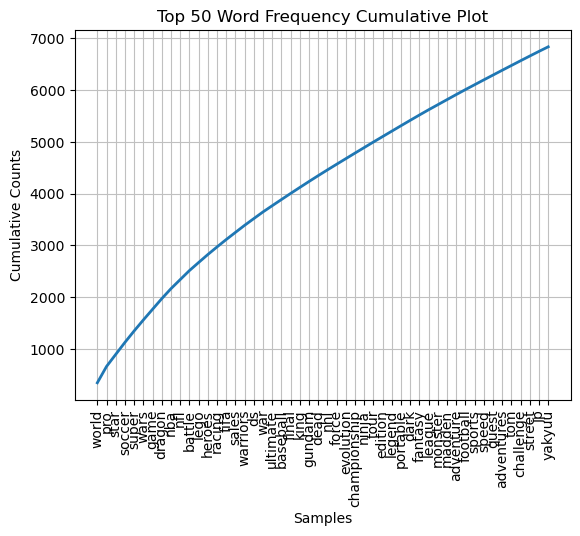

<Axes: title={'center': 'Top 50 Word Frequency Cumulative Plot'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [32]:
fdist.plot(50,cumulative=True,title='Top 50 Word Frequency Cumulative Plot')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier# Applying k = 3, default Minkowski distance metrics
from sklearn.metrics import f1_score
from sklearn import metrics

bow_vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,2))

# split dataset into training and validation set
y = df.Genre
x = df.Name
xtrain, xval, ytrain, yval = train_test_split(x,y, test_size = 0.2)

# create the TF-IDF features
xtrain_bow = bow_vectorizer.fit_transform(xtrain)
xval_bow = bow_vectorizer.transform(xval)


mnb = MultinomialNB()
lr = LogisticRegression(max_iter=1000)
rfc = RandomForestClassifier(random_state=0)
svm = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=3)

# fit model on train data
mnb.fit(xtrain_bow, ytrain)
lr.fit(xtrain_bow, ytrain)
rfc.fit(xtrain_bow, ytrain)
svm.fit(xtrain_bow, ytrain)
knn.fit(xtrain_bow, ytrain)

# make predictions for validation set
mnb_pred = mnb.predict(xval_bow)
lr_pred = lr.predict(xval_bow)
rfc_pred = rfc.predict(xval_bow)
svm_pred = svm.predict(xval_bow)
knn_pred = knn.predict(xval_bow)

# evaluate performance
mnb_acc = metrics.accuracy_score(yval, mnb_pred)
mnb_acc = round(mnb_acc,2)
lr_acc = metrics.accuracy_score(yval, lr_pred)
lr_acc = round(lr_acc,2)
rfc_acc = metrics.accuracy_score(yval, rfc_pred)
rfc_acc = round(rfc_acc,2)
svm_acc = metrics.accuracy_score(yval, svm_pred)
svm_acc = round(svm_acc,2)
knn_acc = metrics.accuracy_score(yval, knn_pred)
knn_acc = round(knn_acc,2)

In [35]:
print(f"BOW Accuracy Scores:\nMultinomial Naive Bayes: {mnb_acc}")
print(f"Logistic Regression: {lr_acc}")
print(f"Random Forest Classifier: {rfc_acc}")
print(f"Support Vector Machine: {svm_acc}")
print(f"K Nearest Neighbourhood: {knn_acc}")

BOW Accuracy Scores:
Multinomial Naive Bayes: 0.78
Logistic Regression: 0.8
Random Forest Classifier: 0.81
Support Vector Machine: 0.81
K Nearest Neighbourhood: 0.71


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2))

# split dataset into training and validation set
y = df.Genre
x = df.Name
xtrain, xval, ytrain, yval = train_test_split(x,y, test_size = 0.2)

# create the TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)


mnb = MultinomialNB()
lr = LogisticRegression(max_iter=1000)
rfc = RandomForestClassifier(random_state=0)
svm = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=3)

# fit model on train data
mnb.fit(xtrain_tfidf, ytrain)
lr.fit(xtrain_tfidf, ytrain)
rfc.fit(xtrain_tfidf, ytrain)
svm.fit(xtrain_tfidf, ytrain)
knn.fit(xtrain_tfidf, ytrain)

# make predictions for validation set
mnb_pred = mnb.predict(xval_tfidf)
lr_pred = lr.predict(xval_tfidf)
rfc_pred = rfc.predict(xval_tfidf)
svm_pred = svm.predict(xval_tfidf)
knn_pred = knn.predict(xval_tfidf)

# evaluate performance
mnb_acc = metrics.accuracy_score(yval, mnb_pred)
mnb_acc = round(mnb_acc,2)
lr_acc = metrics.accuracy_score(yval, lr_pred)
lr_acc = round(lr_acc,2)
rfc_acc = metrics.accuracy_score(yval, rfc_pred)
rfc_acc = round(rfc_acc,2)
svm_acc = metrics.accuracy_score(yval, svm_pred)
svm_acc = round(svm_acc,2)
knn_acc = metrics.accuracy_score(yval, knn_pred)
knn_acc = round(knn_acc,2)

In [37]:
print(f"TFIDF Accuracy Scores:\nMultinomial Naive Bayes: {mnb_acc}")
print(f"Logistic Regression: {lr_acc}")
print(f"Random Forest Classifier: {rfc_acc}")
print(f"Support Vector Machine: {svm_acc}")
print(f"K Nearest Neighbourhood: {knn_acc}")

TFIDF Accuracy Scores:
Multinomial Naive Bayes: 0.7
Logistic Regression: 0.75
Random Forest Classifier: 0.81
Support Vector Machine: 0.81
K Nearest Neighbourhood: 0.59


In [38]:
pred_df = pd.DataFrame(xval)
pred_df['actual'] = yval
pred_df['prediction'] = svm_pred
pred_df.sample(30)

,Name,actual,prediction
5505,fire emblem thracia,Strategy,Strategy
8832,official game,Action,Action
4134,dog island,Adventure,Adventure
11379,puyo pop fever,Strategy,Strategy
11679,rugby,Sports,Sports
9862,uprising,Action,Action
3900,katamari forever,Strategy,Strategy
2274,turok,Action,Action
3446,theme park roller coaster,Strategy,Simulation
9774,metal gear solid phantom pain,Action,Action
